In [23]:
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/bogdan/Workspace/claimchain-core/venv/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [69]:
import pickle
import seaborn as sns

In [44]:
from scenarios import *

In [89]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")
sns.set_palette('colorblind', n_colors=4)

In [51]:
parsed_logs_folder = 'Enron/parsing/'
social_graph = pickle.load(open(parsed_logs_folder + "social.pkl", "rb"))
log = pickle.load(open(parsed_logs_folder + "replay_log.pkl", "rb"))

In [90]:
def visualize_propagation(scenario_name, kp, hp):
    kp = kp[['Stale', 'Updated', 'Not updated']]
    hp = hp[['Stale', 'Updated', 'Not updated']]
    
    kp.plot.area()
    plt.legend(frameon=True)
    plt.title("%s — Encryption keys propagation" % scenario_name)
    plt.xlabel("Emails sent")
    plt.ylabel("Link Key status")
    
    plt.savefig(scenario_name.lower().replace(' ', '_') + '_key_propagation.pdf')

    hp.plot.area()
    plt.legend(frameon=True)
    plt.title("%s — Head propagation" % scenario_name)
    plt.xlabel("Emails sent")
    plt.ylabel("Link Head status")
    
    plt.savefig(scenario_name.lower().replace(' ', '_') + '_head_propagation.pdf')

In [72]:
autocrypt_key_propagation, autocrypt_head_propagation = simulate_static_autocrypt(social_graph, log)

Simulating the static view scenario of Autocrypt:
Userset users know of 8402 updates of their friends, while 11790 entries were not updated.
49844 out of the 95615 emails sent by users in the userset were encrypted.


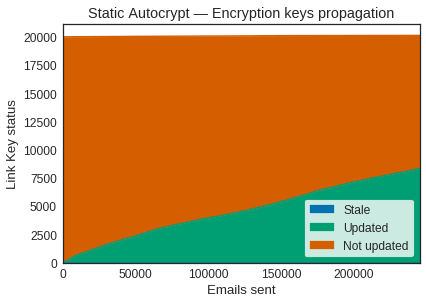

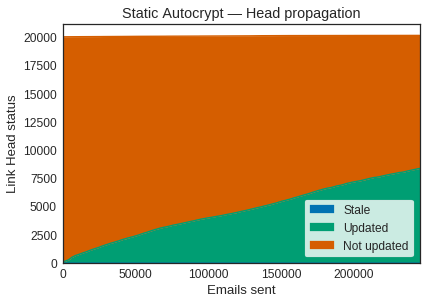

In [91]:
visualize_propagation('Static Autocrypt', autocrypt_key_propagation, autocrypt_head_propagation)
plt.show()

In [78]:
cc_no_privacy_key_propagation, cc_no_privacy_head_propagation = simulate_static_claimchain_no_privacy(social_graph, log)

Simulating the static view scenario of ClaimChain with public claims:
Userset users know of 11993 updates of their friends, while 8199 entries were not updated.
58641 out of the 95615 emails sent by users in the userset were encrypted.


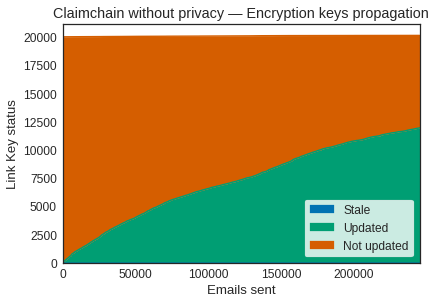

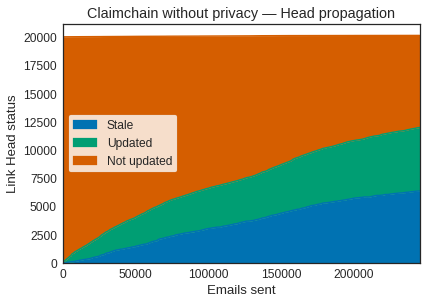

In [92]:
visualize_propagation('Claimchain without privacy', cc_no_privacy_key_propagation, cc_no_privacy_head_propagation)
plt.show()

In [93]:
cc_privacy_key_propagation, cc_privacy_head_propagation = simulate_static_claimchain_with_privacy(social_graph, log)

Simulating the static view scenario of ClaimChain with private claims and introductions:
Userset users know of 8685 updates of their friends, while 11561 entries were not updated.
51108 out of the 95615 emails sent by users in the userset were encrypted.


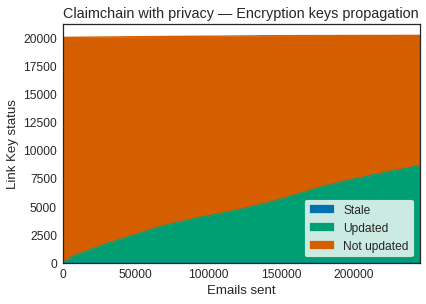

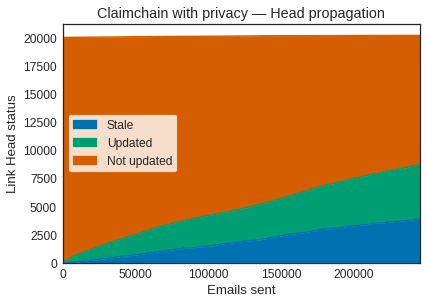

In [94]:
visualize_propagation('Claimchain with privacy', cc_privacy_key_propagation, cc_privacy_head_propagation)

In [95]:
dyn_autocrypt_key_propagation, dyn_autocrypt_head_propagation = \
        simulate_dynamic_autocrypt(social_graph, log)

Simulating the dynamic view scenario of Autocrypt:
Userset users know of 8402 updates of their friends, while 11790 entries were not updated.
49844 out of the 95615 emails sent by users in the userset were encrypted.


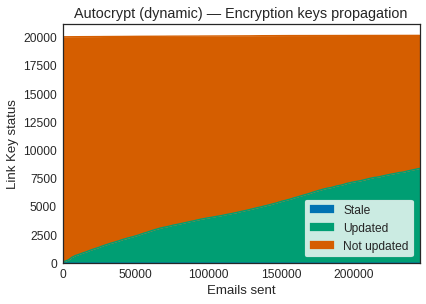

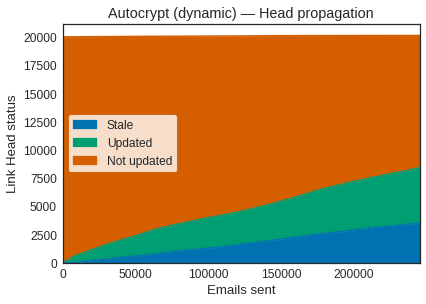

In [96]:
visualize_propagation('Autocrypt (dynamic)',
                      dyn_autocrypt_key_propagation, dyn_autocrypt_head_propagation)

In [97]:
dyn_cc_no_privacy_key_propagation, dyn_cc_no_privacy_head_propagation = \
        simulate_dynamic_claimchain_no_privacy(social_graph, log)

Simulating the dynamic view scenario of ClaimChain with public claims:
Userset users know of 12016 updates of their friends, while 8176 entries were not updated.
58709 out of the 95615 emails sent by users in the userset were encrypted.


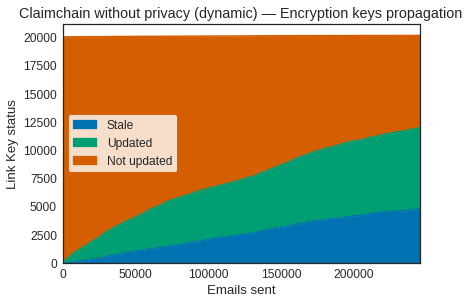

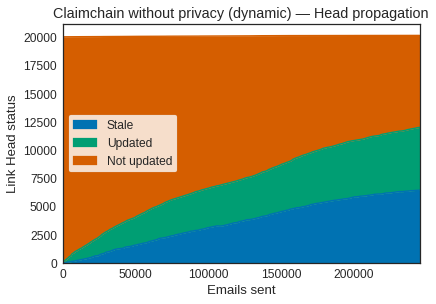

In [98]:
visualize_propagation('Claimchain without privacy (dynamic)',
                      dyn_cc_no_privacy_key_propagation, dyn_cc_no_privacy_head_propagation)

In [99]:
dyn_cc_privacy_key_propagation, dyn_cc_privacy_head_propagation = \
        simulate_dynamic_claimchain_with_privacy(social_graph, log)

Simulating the dynamic view scenario of ClaimChain with private claims and introductions:
Userset users know of 8723 updates of their friends, while 11523 entries were not updated.
51483 out of the 95615 emails sent by users in the userset were encrypted.


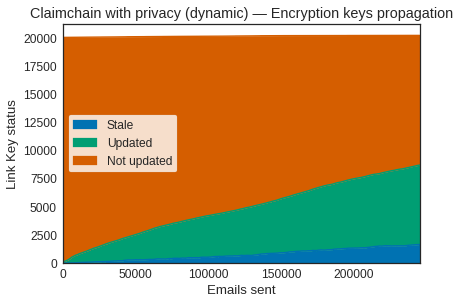

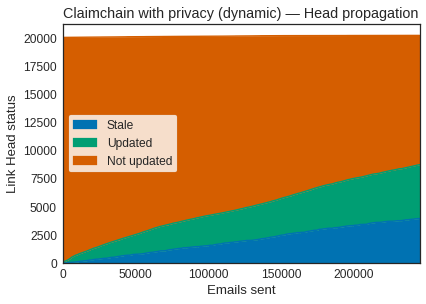

In [100]:
visualize_propagation('Claimchain with privacy (dynamic)',
                      dyn_cc_privacy_key_propagation, dyn_cc_privacy_head_propagation)